# Restricted Boltzmann Machines

An energy-based model of learning the probability distribution. 

Uses some visual binary variables $\vec{v}$ and some hidden variables $\vec{h}$ and allows only for interactions between visual and hidden units, not among them. This factorizes the conditional probabilities $P(v|h), P(h|v)$ into product of probabilities of each unit (i.e. $p(v_1)p(v_2)\dots p(v_n)$).  
The visual variables represent the data, with n number of features, and the hidden are the latent representation of the data.  

The model updates the weigths by maximizing the probability of observing those data which leads to minimizing the difference between the data distribution and the distribution of the model.
After trained we can sample by the model distribution.
Note that all variables of the model are binary. We could use it in gray images. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.neural_network import BernoulliRBM

In [2]:
def create_data_sets(n):

    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train/255, x_test/255
    
    x = np.concatenate((x_train, x_test))
    y = np.concatenate((y_train, y_test))
    
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation]
    y = y[permutation]
    
    return x[:n], y[:n]

shape of set (10000, 28, 28), (10000,)


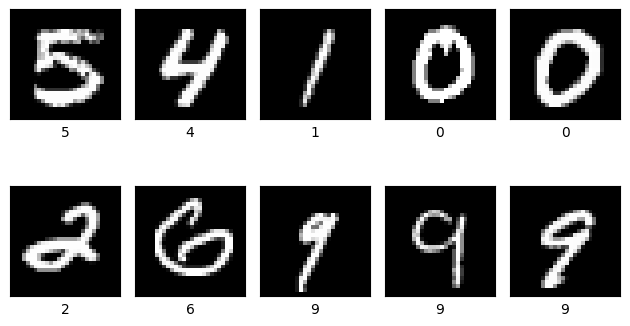

In [3]:
# create and inspect the data sets
n_data = 10**4
x, y = create_data_sets(n_data)

print(f'shape of set {x.shape}, {y.shape}')

# plot some training examples
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x[i],
               cmap= 'gray'
               )
    plt.xlabel(f'{y[i]}')
    # plt.axis('off')
    plt.xticks(())
    plt.yticks(())
    plt.tight_layout()

In [4]:
# define the number of hidden units
latent_pixels = 10
rbm_model = BernoulliRBM(n_components=latent_pixels*latent_pixels,
             learning_rate=0.05,
             n_iter=30,
             verbose=1,
             )
rbm_model.fit(x.reshape(n_data, -1))

[BernoulliRBM] Iteration 1, pseudo-likelihood = -120.64, time = 2.05s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -107.60, time = 2.13s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -99.52, time = 2.08s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -93.44, time = 2.22s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -94.90, time = 2.30s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -95.96, time = 2.58s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -90.03, time = 2.29s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -90.85, time = 2.29s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -91.22, time = 2.06s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -90.19, time = 2.10s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -90.03, time = 2.26s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -87.27, time = 2.77s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -88.21, time = 2.86s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -89.83, time = 2.66s
[BernoulliRBM] Iteration 15

BernoulliRBM(learning_rate=0.05, n_components=100, n_iter=30, verbose=1)

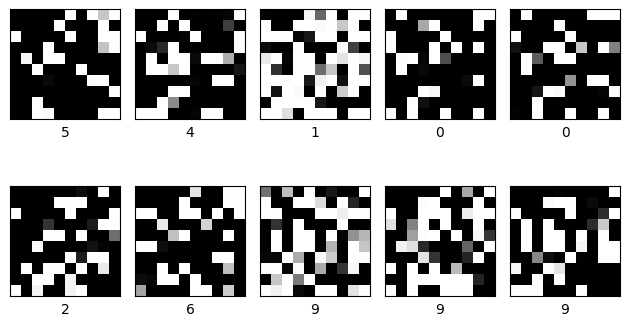

In [5]:
# we can transform the data to the latent space
latent_data = rbm_model.transform(x.reshape(n_data, -1))

# visualize some latent examples
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(latent_data[i].reshape(latent_pixels, latent_pixels),
               cmap= 'gray'
               )
    plt.xlabel(f'{y[i]}')
    plt.xticks(())
    plt.yticks(())
    plt.tight_layout()

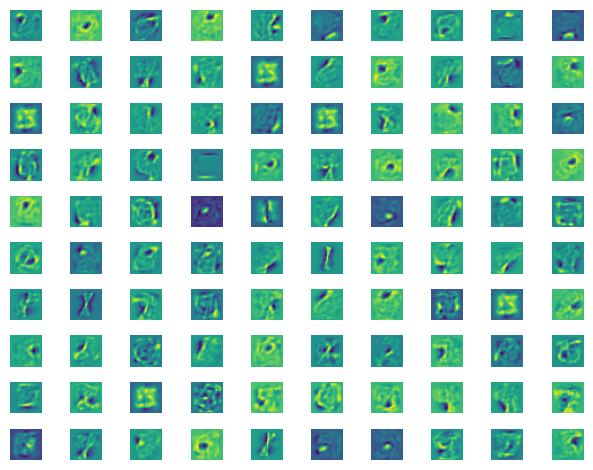

In [6]:
# visualize the weights learned by the RBM between the visual and hidden units
for i in range(latent_pixels**2):
    # plt.figure(figsize=(10, 10))
    plt.subplot(latent_pixels, latent_pixels, i+1)
    plt.imshow(rbm_model.components_[i].reshape(28, 28),
            #    cmap='grey',
               )
    plt.axis('off')
    plt.tight_layout()

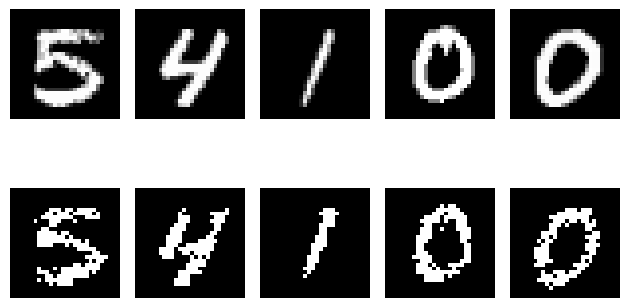

In [8]:
# Gibb's sample from the learned distribution over the visual variables

for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(x[i], cmap='grey')
    plt.axis('off')

    x_sample = rbm_model.gibbs(x[i].reshape(-1)) 
    plt.subplot(2, 5, i+6)
    plt.imshow(x_sample.reshape(28, 28), cmap='grey')
    plt.axis('off')
    plt.tight_layout()

original images and RBM sampling from those


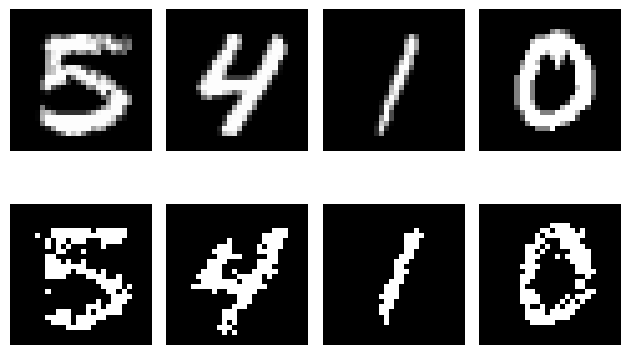

noised images and RBM sampling from those


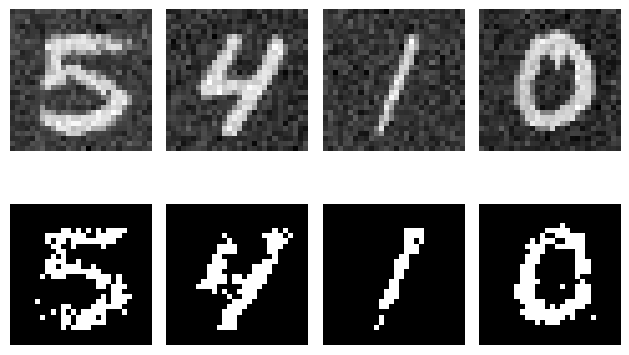

In [37]:
# try to add some noise to the images and sample from those
n_img = 4
x_noise = x[:n_img] + np.random.normal(0, 0.1, n_img*28*28).reshape(n_img, 28, 28)

print('original images and RBM sampling from those')
for i in range(n_img):
    plt.subplot(2, n_img, i+1)
    plt.imshow(x[i], 
               cmap='grey'
               )
    plt.axis('off')
    
    x_sample = rbm_model.gibbs(x[i].reshape(-1)) 
    plt.subplot(2, n_img, i+n_img+1)
    plt.imshow(x_sample.reshape(28, 28), cmap='grey')
    plt.axis('off')
    plt.tight_layout()
plt.show()

print('noised images and RBM sampling from those')
for i in range(n_img):
    plt.subplot(2, n_img, i+1)
    plt.imshow(x_noise[i],
               cmap='grey',
               )
    plt.axis('off')
    
    x_sample = rbm_model.gibbs(x_noise[i].reshape(-1)) 
    plt.subplot(2, n_img, i+n_img+1)
    plt.imshow(x_sample.reshape(28, 28), cmap='grey')
    plt.axis('off')
    plt.tight_layout()
plt.show()

Note that slight distortions of the original images does not affect much the sampling from the RBM since it uses binary values anyway.